In [1]:
# First upload your "flowers" folder to Drive. Any location is fine.
# Second run this command. You will get a link follow that link and you will get an activation code. Copy and paste the code here.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

#TL pecific modules
from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
X=[] #images array
Z=[] #labels array

IMG_SIZE=150
#path variables
daisy = '/content/gdrive/My Drive/flowers/daisy'
sunflower = '/content/gdrive/My Drive/flowers/sunflower'
tulip ='/content/gdrive/My Drive/flowers/tulip'
dandelion ='/content/gdrive/My Drive/flowers/dandelion'
rose ='/content/gdrive/My Drive/flowers/rose'

In [4]:
def assign_label(img,flower_type):
    return flower_type

In [5]:
def make_train_data(flower_type, directory):
    for img in tqdm(os.listdir(directory)):
        try:
            label=assign_label(img,flower_type)
            path = os.path.join(directory,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            X.append(np.array(img))
            Z.append(str(label))
        except Exception as e:
            print("One bad image format found. Omitting this picture. \n\n", str(e))

In [6]:
make_train_data('Daisy',daisy)
print(len(X))

100%|██████████| 770/770 [00:04<00:00, 179.12it/s]

One bad image format found. Omitting this picture. 

 OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

769


In [7]:
make_train_data('Sunflower',sunflower)
print(len(X))

100%|██████████| 735/735 [00:04<00:00, 161.59it/s]

One bad image format found. Omitting this picture. 

 OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

1503


In [8]:
make_train_data('Tulip',tulip)
print(len(X))

100%|██████████| 995/995 [00:05<00:00, 169.16it/s]

One bad image format found. Omitting this picture. 

 OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

2497


In [9]:
make_train_data('Dandelion',dandelion)
print(len(X))

 83%|████████▎ | 878/1056 [00:05<00:01, 171.14it/s]

One bad image format found. Omitting this picture. 

 OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 94%|█████████▍| 994/1056 [00:05<00:00, 151.83it/s]

One bad image format found. Omitting this picture. 

 OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

One bad image format found. Omitting this picture. 

 OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

One bad image format found. Omitting this picture. 

 OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



100%|██████████| 1056/1056 [00:06<00:00, 167.29it/s]

3549


In [10]:
make_train_data('Rose',rose)
print(len(X))

100%|██████████| 785/785 [00:04<00:00, 170.69it/s]

One bad image format found. Omitting this picture. 

 OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

4333


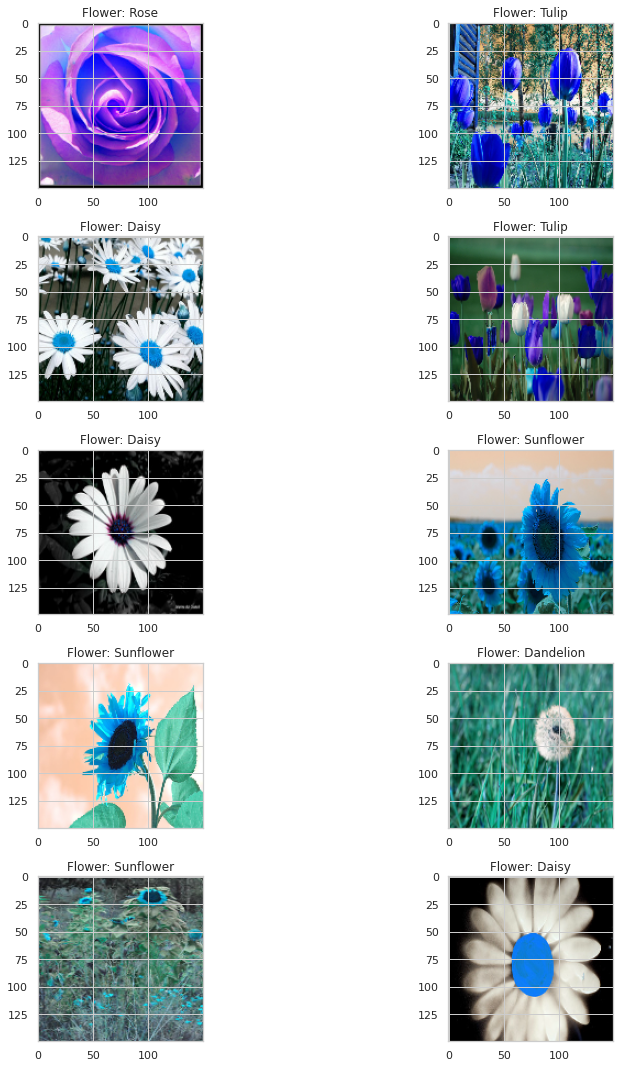

In [11]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

In [12]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.05,random_state=42)

In [14]:
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

In [15]:
from keras.applications.densenet import DenseNet121

base_model=DenseNet121(include_top=False, weights='imagenet',input_shape=(150,150,3), pooling='avg')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [16]:
base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 75, 75, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [17]:
model=Sequential()
model.add(base_model)

model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [18]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [19]:
batch_size=128
red_lr=ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=2, verbose=1)

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 1024)              7037504   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 7,301,189
Trainable params: 7,217,541
Non-trainable params: 83,648
_________________________________________________________________


In [21]:
base_model.trainable=False # setting the VGG model to be untrainable.


In [22]:
model.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])


In [23]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = 15, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/15
32/32 [==============================] - 373s 12s/step - loss: 1.5793 - accuracy: 0.3335 - val_loss: 1.1978 - val_accuracy: 0.5392
Epoch 2/15
32/32 [==============================] - 366s 11s/step - loss: 1.1131 - accuracy: 0.5832 - val_loss: 0.9883 - val_accuracy: 0.6083
Epoch 3/15
32/32 [==============================] - 364s 11s/step - loss: 0.8913 - accuracy: 0.6763 - val_loss: 0.8798 - val_accuracy: 0.6221
Epoch 4/15
32/32 [==============================] - 365s 11s/step - loss: 0.7782 - accuracy: 0.7166 - val_loss: 0.7829 - val_accuracy: 0.6820
Epoch 5/15
32/32 [==============================] - 373s 12s/step - loss: 0.6963 - accuracy: 0.7518 - val_loss: 0.7440 - val_accuracy: 0.7189
Epoch 6/15
32/32 [==============================] - 377s 12s/step - loss: 0.6442 - accuracy: 0.7666 - val_loss: 0.6876 - val_accuracy: 0.7419
Epoch 7/15
32/32 [==============================] - 365s 11s/step - loss: 0.6218 - accuracy: 0.7854 - val_loss: 0.6938 - val_accuracy: 0.7373
Epoch 

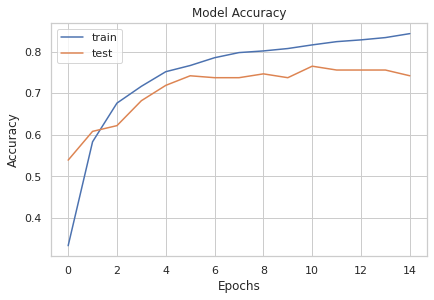

In [24]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

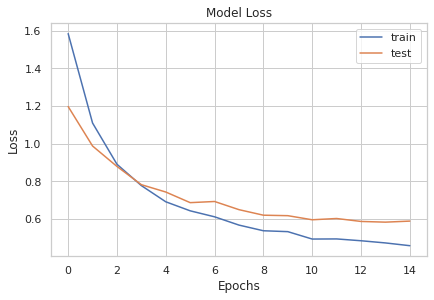

In [25]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()